In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score,classification_report
from sklearn import svm, metrics
from numpy import argmax
from sklearn.neural_network import MLPClassifier

# Let's take a look at our dataset's keys

In [2]:
load_digits().keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

# Take a look at the dataset description

In [3]:
print(load_digits()['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [35]:
digits = load_digits()

# Let's just look at an example of one of the images and take a look at what we're working with


<Figure size 432x288 with 0 Axes>

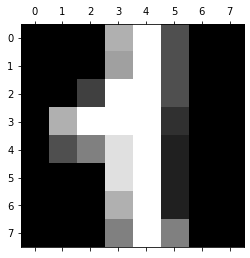

In [36]:
plt.gray()
plt.matshow(digits.images[93]) 
plt.show() 

In [37]:
print(digits.data.shape)
print(digits.target.shape)
print(digits.target_names.shape)
print(digits.images.shape)

(1797, 64)
(1797,)
(10,)
(1797, 8, 8)


# We split the data set into training and testing data and check shapes

In [45]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1347, 64)
(1347,)
(450, 64)
(450,)


In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1347, 64)
(450, 64)
(1347,)
(450,)


I decided to first use a C Support Vector Classification. SVC is basically a subset of Support Vector Machines. What this does is create hyperplanes for classification. An example of a hyperplane could be ones that represent margins or largest separations 

In [52]:
vector_classifier = svm.SVC(gamma = 0.01)

In [53]:
vector_classifier.fit(x_train, y_train) ##just like model.fit and it prints the "model summary"

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
vector_predict = vector_classifier.predict(x_test)

In [55]:
vector_classifier.score(x_test,y_test)*100

78.88888888888889

Here I'm going to print out a confusion matrix and the f1 scores. A confusion matrix basically tells us how many pictures the model predicted correctly and if it made an iccorect prediction, what was it. The y-axis is the true label for each image and the x_axis is what the model predicted. F1 scores is a measure of accuracy. Here is a link that gives a description of f1_scores https://en.wikipedia.org/wiki/F1_score.

Classification report for vector classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        51
           1       1.00      0.73      0.84        48
           2       1.00      0.84      0.91        38
           3       1.00      0.75      0.85        51
           4       1.00      0.87      0.93        38
           5       1.00      0.89      0.94        44
           6       1.00      0.77      0.87        48
           7       1.00      0.76      0.86        46
           8       0.29      1.00      0.45        39
           9       1.00      0.72      0.84        47

    accuracy                           0.79       450
   macro avg       0.93      0.80      0.83       450
weig

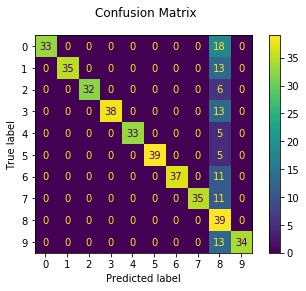

In [67]:
print("Classification report for vector classifier %s:\n%s\n"% (vector_classifier, metrics.classification_report(y_test, vector_predict)))
array = metrics.plot_confusion_matrix(vector_classifier, x_test, y_test)
array.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % array.confusion_matrix)
plt.show()

As we can see, the model did an ok job at classifying the images with 79% accuracy. It had trouble with the 8 image so now I'm going to use our classic gradient descent. 

In [69]:
sgd_clf = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (1000,), learning_rate = 'adaptive', random_state = 1, early_stopping = True)

MLPClassifier uses three different optimizers. I chose gradient descent as my optimizer or solver in this case. Hidden layers is exactly what it sounds like. Adaptive means that the learning rate is kept constant as long as the training loss decreases. 

In [71]:
sgd_clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1000,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [73]:
sgd_predict = sgd_clf.predict(x_test)

In [74]:
sgd_clf.score(x_test, y_test)*100

95.33333333333334

The model is now effectively able to differentiate the images

Classification report for vector classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1000,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.88      0.94      0.91        48
           2       0.97      0.97      0.97        38
           3       1.00      0.88      0.94        51
           4       1.00      0.95      0.97        38
           5       0.95      0.93      0.94        44
           6       0.98      0.94      0.96        48


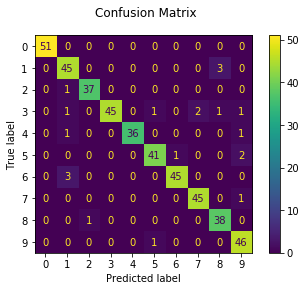

In [75]:
print("Classification report for vector classifier %s:\n%s\n"% (sgd_clf, metrics.classification_report(y_test, sgd_predict)))
sgd_array = metrics.plot_confusion_matrix(sgd_clf, x_test, y_test)
sgd_array.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % sgd_array.confusion_matrix)
plt.show()